In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df=pd.read_csv('FoodPrice_in_Turkey.csv')
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


Xử lý dữ liệu ngoại lai cho đặc trưng Price

<AxesSubplot:xlabel='Price'>

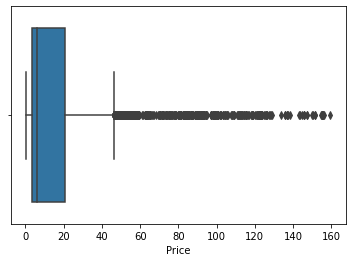

In [102]:
sns.boxplot(x=df['Price'])

In [103]:
des_price = df['Price'].describe()
des_price

count    7381.000000
mean       15.738709
std        22.418284
min         0.253900
25%         3.223600
50%         5.909600
75%        20.441900
max       159.445800
Name: Price, dtype: float64

In [104]:
Q1 = des_price['25%']
Q3 = des_price['75%']
IQR = Q3-Q1

In [105]:
df = df[~((df['Price'] < (Q1 - 1.5*IQR)) | (df['Price'] > (Q3 + 1.5*IQR))) == True]

<AxesSubplot:xlabel='Price'>

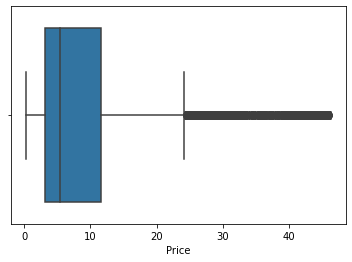

In [106]:
sns.boxplot(x=df['Price'])

Biểu đồ cột so sánh giá gạo (Rice-Retail) tháng 12 năm 2019 của Nơi bán 

In [107]:
dt1 = df[(df['Year'] == 2019) & (df['Month'] == 12) & (df['ProductName'] == 'Rice - Retail')]

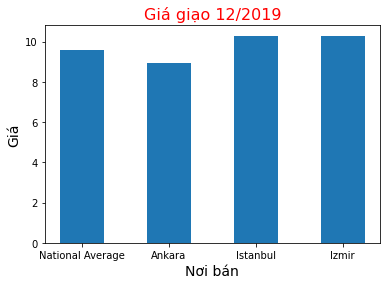

In [108]:
plt.bar(dt1['Place'], dt1['Price'], width = 0.5)
plt.title('Giá giạo 12/2019', fontsize = 16, color = 'r')
plt.xlabel('Nơi bán', fontsize = 14)
plt.ylabel('Giá', fontsize = 14)
plt.show()

Biểu đồ đường phân tích xu hướng giá gạo (Rice-Retail) trung bình cả nước (National Average) trong năm 2019

In [109]:
dt2 = df[(df['Place'] == 'National Average') & (df['Year'] == 2019) & (df['ProductName'] == 'Rice - Retail')]

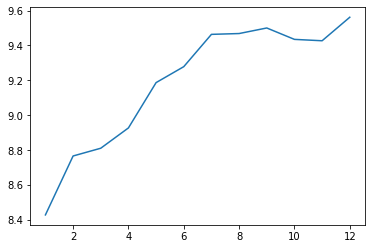

In [110]:
plt.plot(dt2['Month'], dt2['Price'])
plt.show()

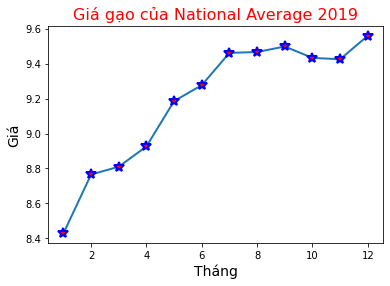

In [111]:
plt.plot(dt2['Month'], dt2['Price'], linewidth = 2, marker = '*', markersize=10, markerfacecolor='red', markeredgecolor = 'blue', markeredgewidth=2)
plt.title('Giá gạo của National Average 2019', fontsize = 16, color = 'r')
plt.xlabel('Tháng', fontsize = 14)
plt.ylabel('Giá', fontsize = 14)
plt.show()

Biểu đồ cột so sánh giá Rice và Wheat flour tháng 12 cuối năm năm 2019 của Ankara, Istanbul, Izmir và National Average.

In [112]:
dt3 = df[(df['Year'] == 2019) & (df['Month'] == 12) & (df['ProductName'] == 'Rice - Retail')].reset_index()
dt4 = df[(df['Year'] == 2019) & (df['Month'] == 12) & (df['ProductName'] == 'Wheat flour - Retail')].reset_index()
dt5 = pd.DataFrame({'x': dt3['Place'], 'y1': dt3['Price'], 'y2': dt4['Price']})

In [113]:
dt5

,x,y1,y2
0,National Average,9.5616,3.9411
1,Ankara,8.9477,3.5142
2,Istanbul,10.2924,4.1495
3,Izmir,10.2803,4.2703


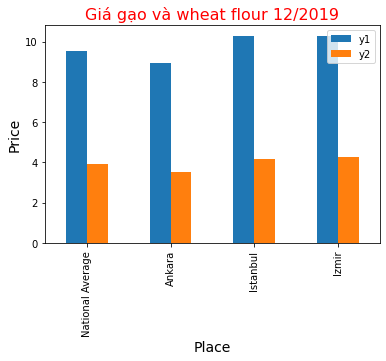

In [114]:
dt5.plot(x = 'x', y = ['y1', 'y2'], kind = 'bar')
plt.title('Giá gạo và wheat flour 12/2019', fontsize = 16, color = 'r')
plt.xlabel('Place', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.show()

Biểu đồ xu hướng giá gạo qua các năm

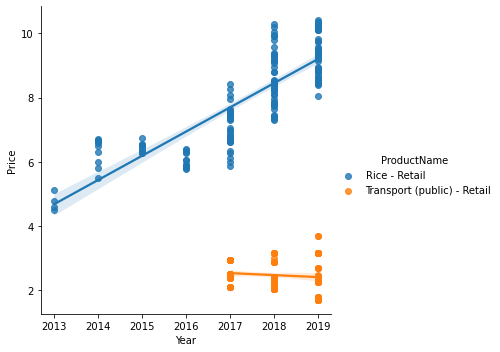

In [115]:
trans_df = df[(df["ProductName"] == "Transport (public) - Retail") | (df["ProductName"] == "Rice - Retail")]
sns.lmplot(x="Year", y="Price", hue="ProductName", data = trans_df)

Biểu đồ phân bố cho giá sản phẩm

<AxesSubplot:ylabel='Price'>

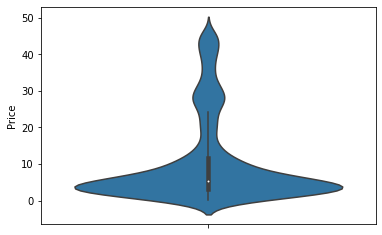

In [116]:
sns.violinplot(y = "Price", data=df)

Biểu đồ phân bố cho năm của sản phẩm

<AxesSubplot:ylabel='Year'>

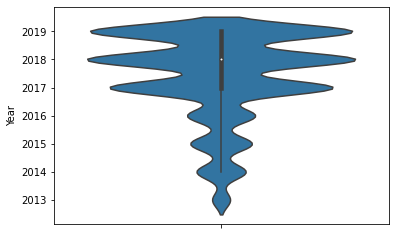

In [117]:
sns.violinplot(y = "Year", data=df)

Với mức ý nghĩa 5% hay kiểm định giả thuyết: giá bán lẻ gạo trung bình năm 2019 là 9.5 (Lira)/1 kg Turkish Lira là đơn vị tiền tệ ở Turkey (1usd ~ 8-9 Lira)

In [118]:
from scipy import stats

In [119]:
product_names = list(df['ProductName'].unique()) 

In [120]:
df_rice = df.loc[(df.ProductName== 'Rice - Retail') & (df.Year == 2019)]
df_rice.shape

(48, 8)

<AxesSubplot:>

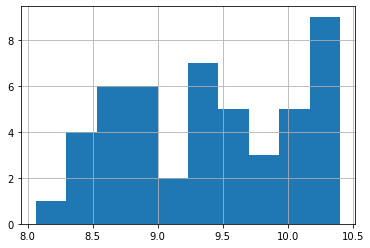

In [121]:
df_rice.Price.hist()

In [122]:
stats.ttest_1samp(df_rice.Price, 9.5)

Ttest_1sampResult(statistic=-1.1854023812590566, pvalue=0.24181730968913567)